# First semester Project 

## PLEASE OPEN THIS NOTEBOOK IN PYTHON 3

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

**The goal of this notebook is to make the prediction by implementing the actions described in the cells. Each cell has a level, please complete the level 1, then 2, then 3 and then ++.**
**Do not hesitate to add comments, to proper print your code and to explain the outputs.**

## Load and examine


In [1]:
# Level 1 
# Import the usual libraries.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
# Level 1 
# Read and parse the loan_data.cs file.
df = pd.read_csv('loan_data.csv')


In [31]:
# Level 1 
# Prints information about a dataset (hint 1).
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# Level 1 
# Prints the first rows of the dataset (hint 2).
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [32]:
# Level 1 
# Generate descriptive statistics of the dataset (hint 3).
df.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [16]:
# Level 1 
# How many rows and columns does the dataset have ?
print("le nombre de lignes est :", df.shape[0])
print("le nombre de lignes est :", df.shape[1])

le nombre de lignes est : 9578
le nombre de lignes est : 14


In [38]:
# Level 1 
# List all purposes of this dataset.
print("les differentes valeurs de la colonne purpose sont :")
df['purpose'].unique()

les differentes valeurs de la colonne purpose sont :


array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

## Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Focus on getting the main idea of the plot and do not hesitate to comment it.

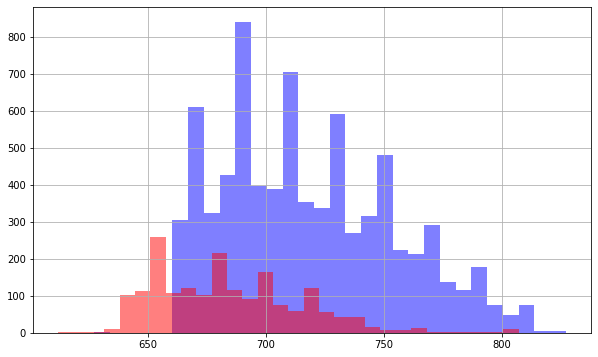

In [53]:
# Level 1 
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome. 
# (hint 4 and 4 bis)
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30,label = 'credit.policy =1 ')
df[df['credit.policy'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30,label = 'credit.policy = 0')



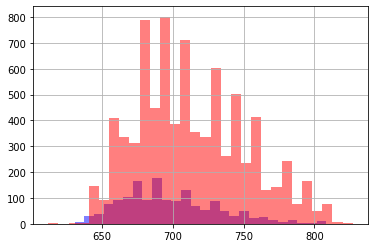

In [57]:
# Level 1 
# Create a similar figure, except this time select by the not.fully.paid column.
#(hint 5)

df[df['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30,label = 'not.fully.paid =1 ')
df[df['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30,label = 'not.fully.paid = 0')

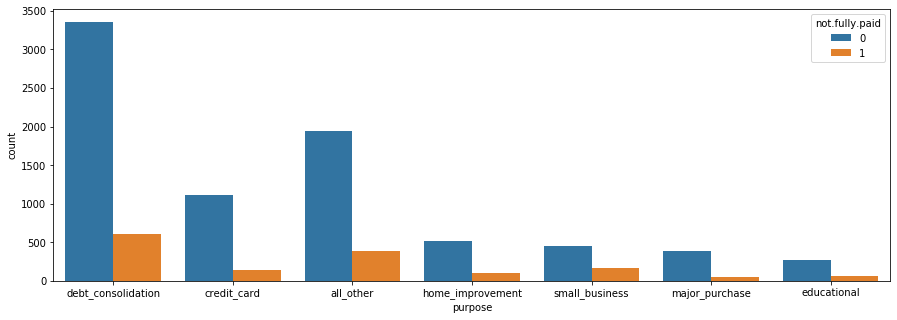

In [66]:
# Level 2
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
# (hint 6)

import seaborn as sns 
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')


<Figure size 3600x1080 with 0 Axes>

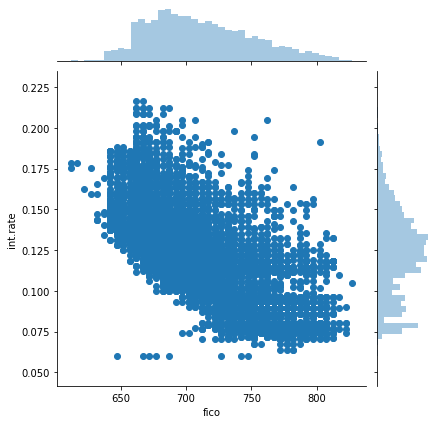

In [71]:
# Level 3
# Let's see the trend between FICO score and interest rate. Use the jointplot function.
plt.figure(figsize=(50,15))
sns.jointplot(data=df,x='fico',y='int.rate')

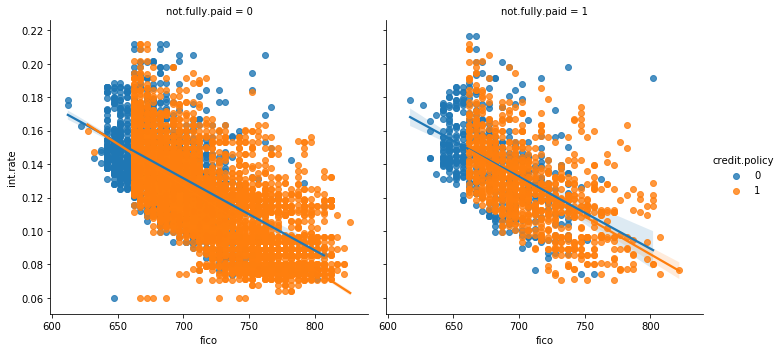

In [74]:
# Level 3
# Create lmplots to see if the trend differed between not.fully.paid and credit.policy.
# Check the documentation for lmplot() if you can't figure out how to separate it into columns.
# (hint 8)
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid')


In [ ]:
# Level ++
# Is there any other pertinent visualization do plot? explain and describe it

## Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

In [67]:
# Level 1 
# Check the information of the dataset with info() again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [80]:
# Level 1 
# Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.
cat_feats = ['purpose']
cat_feats


['purpose']

In [83]:
# Level 1 
# Now use get_dummies() to create a fixed larger dataframe that has new feature columns with dummy variables.
# Set this dataframe as final_data.
# (hint 9)
final_data = pd.get_dummies(df, columns=cat_feats)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

In [90]:
# Level 1 
# Separate your data into a training and a test set
# with 80% for the training set.
x = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=0)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [93]:
# Level 1 
# Is this a classification or a regression problem ?
print("> Le problème est de classification")
# Import the appropriate version of DecisionTree, then
# train it with your training data.
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

> Le problème est de classification


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predictions and Evaluation of Decision Tree


In [138]:
# Level 1 
# What is the accuracy of your model (both on training
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))
# and test sets) ? Do you think we are underfitting ? Overfitting ?
print(">>> we are Overfitting")

Train accuracy: 1.000
Test accuracy: 0.720
>>> we are Overfitting


In [139]:
# Level 1 
# Create predictions from the test set and create a classification report and a confusion matrix
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1615
           1       0.18      0.23      0.20       301

    accuracy                           0.72      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.72      0.73      1916

[[1606    9]
 [ 290   11]]


In [98]:
# Level 2
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy
# you obtain?
import itertools
best_test_acc = 0
best_params = {}
range_max_depth   = range(10,30)
range_min_samples = range(2, 10)
range_features    = range(2, X_train.shape[1])
for depth, samples, feature in itertools.product(range_max_depth,range_min_samples,range_features):
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=samples, max_features=feature, random_state=0)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test, y_test)
    if accuracy > best_test_acc:
        best_test_acc = accuracy
        best_params["depth"] = depth
        best_params["samples"] = samples
        best_params["feature"] = feature
        
print("Best accuracy: {:.3f}".format(best_test_acc))
print(">>> max_depth = ", best_params["depth"])
print(">>> min_samples_split = ", best_params["samples"])
print(">>> max_features = ", best_params["feature"])

Best accuracy: 0.840
>>> max_depth =  10
>>> min_samples_split =  6
>>> max_features =  3


In [101]:
# Level 3 
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the whether or not the borrower paid back their loan in full?
df1 = pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=["Importance"])
# We can now sort by decreasing importance and take the
# first three features.
df1.sort_values(by="Importance", ascending=False).head(3)

,Importance
installment,0.132246
dti,0.121295
revol.bal,0.119958


## Training the Random Forest model

Now its time to train our model!


In [140]:
# Level 1 
# Import the appropriate version of RandomForest, then
# train it with your training data.
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [142]:
# Level 1 
# Predict the class of not.fully.paid for the X_test data
import numpy as np
rfc_pred1 = rfc1.predict(X_test)
rfc_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
# Level 1 
# What is the accuracy of your model (both on training
train_acc = rfc1.score(X_train, y_train)
test_acc = rfc1.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))
# and test sets) ? Do you think we are underfitting ? Overfitting ?
print(">>> Overfitting")

Train accuracy: 1.000
Test accuracy: 0.842
>>> Overfitting


In [181]:
# Level 1 
# Create predictions from the test set and create a classification report. 
predictions1 = rfc1.predict(X_test)
print(classification_report(y_test,predictions1))
# Do you get anything strange or some sort of warning?
print('>>> No')

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1615
           1       0.44      0.03      0.05       301

    accuracy                           0.84      1916
   macro avg       0.65      0.51      0.48      1916
weighted avg       0.78      0.84      0.78      1916

>>> No


In [180]:
# Level 1 
# Show the Confusion Matrix for the predictions.
print(confusion_matrix(y_test,rfc_pred1))
# What performed better the random forest or the decision tree?
print(">>> what performed better is the random forest ")

[[1605   10]
 [ 293    8]]
>>> what performed better is the random forest 


In [171]:
# Level 2
# Train other random forest model with different
# hyperparameters (n_estimators, max_features). Can you beat
best_test_acc = 0
best_params = {}
range_n_estimators   = range(20,30)
range_max_features = range(1,15)
for n_es,feature in itertools.product(range_n_estimators,range_max_features):
    
    rfc = RandomForestClassifier(n_estimators=n_es,max_features=feature,random_state=44)
    rfc.fit(X_train,y_train)
    accuracy = rfc.score(X_test, y_test)
    if accuracy > best_test_acc:
        best_test_acc = accuracy
        best_params["estimator"]=n_es
        best_params["Max_feature"]=feature 

print("Best test accuracy: {:.3f}".format(best_test_acc))
print("estimator= ", best_params["estimator"])
print("max_features= ", best_params["Max_feature"])
# the best accuracy you obtained with a single decision tree ?


Best test accuracy: 0.843
estimator=  24
max_features=  4


## Bonus 

In [177]:
# Level 3
# Use other classification models to try to improve your prediction 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)

train_acc2 = knn.score(X_train, y_train)
test_acc2 = knn.score(X_test, y_test)
print("----------------------{knn}-------------------------")
print("Train accuracy: {:.3f}".format(train_acc2))
print("Test accuracy: {:.3f}".format(test_acc2))
print("-----------------------------------------------------\n")
print(">>> We have not the overfeating")

----------------------{knn}-------------------------
Train accuracy: 0.842
Test accuracy: 0.838
-----------------------------------------------------

>>> We have not the overfeating


In [176]:
# Level ++
# Visualize DecisionTree (graphviz, be careful with the dependencies)
import graphviz
d = tree.export_graphviz(dtree, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names,filled=True)

# Draw graph
graph = graphviz.Source(d, format="png") 
graph

SyntaxError: invalid syntax (<ipython-input-176-c5e4fad2bd6c>, line 11)

In [ ]:
# Level ++
# Is there any other evaluation analysis you can implement on your predictions? 

# Great Job!